In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nehe
Processing Record 2 of Set 1 | male
Processing Record 3 of Set 1 | agrado
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | samfya
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | washougal
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | tupik
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | erzincan
Processing Record 18 of Set 1 | san cristobal
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | lolua

Processing Record 39 of Set 4 | limulunga
Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | atambua
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | yulara
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | guozhen
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | rocha
Processing Record 50 of Set 4 | leh
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | san carlos de bariloche
Processing Record 3 of Set 5 | harsin
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | batagay-alyta
Processing Record 6 of Set 5 | bantry
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 9 of Set 5 | red wing
Processing Record 10 of Set 5 | qaanaaq
Processing Record 11 of Set 5 | balgazyn
Processing Record 12 of Set 

Processing Record 26 of Set 8 | sibolga
Processing Record 27 of Set 8 | savannah bight
Processing Record 28 of Set 8 | koindu
Processing Record 29 of Set 8 | cariamanga
Processing Record 30 of Set 8 | rudnogorsk
Processing Record 31 of Set 8 | najran
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | pevek
Processing Record 34 of Set 8 | oistins
Processing Record 35 of Set 8 | robat karim
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | olive branch
Processing Record 38 of Set 8 | grants pass
Processing Record 39 of Set 8 | nasice
Processing Record 40 of Set 8 | kristinehamn
Processing Record 41 of Set 8 | itoman
Processing Record 42 of Set 8 | karaton
Processing Record 43 of Set 8 | kailua
Processing Record 44 of Set 8 | wajima
Processing Record 45 of Set 8 | tonantins
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | mangrol
Processing Record 48 of Set 8 | hamilton
Processing Record 49 of Set 8 | kella
Processing Record 5

Processing Record 18 of Set 12 | el cobre
Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | tevaitoa
Processing Record 21 of Set 12 | staryy nadym
Processing Record 22 of Set 12 | nichinan
Processing Record 23 of Set 12 | waipawa
Processing Record 24 of Set 12 | moletai
Processing Record 25 of Set 12 | lincoln
Processing Record 26 of Set 12 | keetmanshoop
Processing Record 27 of Set 12 | barguzin
Processing Record 28 of Set 12 | ostersund
Processing Record 29 of Set 12 | glendive
Processing Record 30 of Set 12 | aksarka
Processing Record 31 of Set 12 | upata
Processing Record 32 of Set 12 | palauig
Processing Record 33 of Set 12 | ler
Processing Record 34 of Set 12 | saurimo
Processing Record 35 of Set 12 | aloleng
Processing Record 36 of Set 12 | kungurtug
Processing Record 37 of Set 12 | tondano
Processing Record 38 of Set 12 | roebourne
Processing Record 39 of Set 12 | kjollefjord
Processing Record 40 of Set 12 | santa luzia
Processing Record 41 of

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nehe,48.4833,124.8333,32.09,65,86,5.44,CN,2021-10-20 22:25:10
1,Male,4.1748,73.5089,82.35,78,40,9.22,MV,2021-10-20 22:25:11
2,Agrado,2.2573,-75.7714,76.86,72,50,4.74,CO,2021-10-20 22:25:11
3,Cape Town,-33.9258,18.4232,63.09,76,0,1.99,ZA,2021-10-20 22:20:30
4,Bilibino,68.0546,166.4372,0.59,96,100,2.33,RU,2021-10-20 22:25:12
5,Hobart,-42.8794,147.3294,59.05,68,75,5.01,AU,2021-10-20 22:25:06
6,Samfya,-11.3649,29.5565,74.88,45,55,13.76,ZM,2021-10-20 22:25:13
7,Punta Arenas,-53.1500,-70.9167,51.82,50,40,19.57,CL,2021-10-20 22:25:14
8,Washougal,45.5826,-122.3534,64.08,67,75,5.01,US,2021-10-20 22:25:15
9,Airai,-8.9266,125.4092,63.73,68,98,1.54,TL,2021-10-20 22:25:15


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nehe,CN,2021-10-20 22:25:10,48.4833,124.8333,32.09,65,86,5.44
1,Male,MV,2021-10-20 22:25:11,4.1748,73.5089,82.35,78,40,9.22
2,Agrado,CO,2021-10-20 22:25:11,2.2573,-75.7714,76.86,72,50,4.74
3,Cape Town,ZA,2021-10-20 22:20:30,-33.9258,18.4232,63.09,76,0,1.99
4,Bilibino,RU,2021-10-20 22:25:12,68.0546,166.4372,0.59,96,100,2.33
5,Hobart,AU,2021-10-20 22:25:06,-42.8794,147.3294,59.05,68,75,5.01
6,Samfya,ZM,2021-10-20 22:25:13,-11.3649,29.5565,74.88,45,55,13.76
7,Punta Arenas,CL,2021-10-20 22:25:14,-53.1500,-70.9167,51.82,50,40,19.57
8,Washougal,US,2021-10-20 22:25:15,45.5826,-122.3534,64.08,67,75,5.01
9,Airai,TL,2021-10-20 22:25:15,-8.9266,125.4092,63.73,68,98,1.54


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

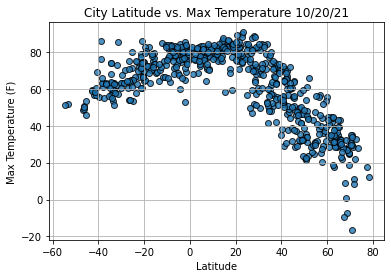

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

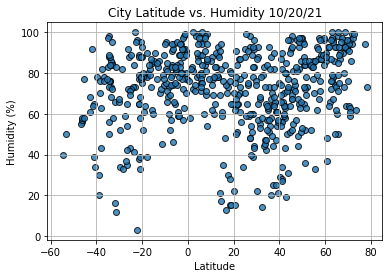

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

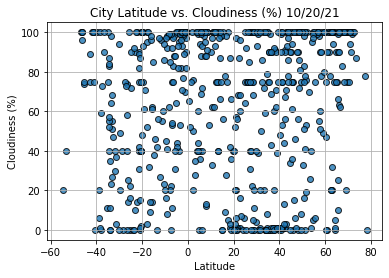

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

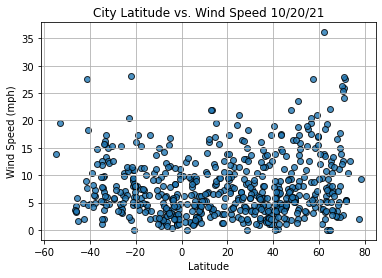

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()